In [31]:
!git clone https://github.com/DS3001/Group4.git

fatal: destination path 'Group4' already exists and is not an empty directory.


In [32]:
#Reading in the training data
import pandas as pd
import numpy as np
import seaborn as sns
data = pd.read_csv("./Group4/project_2/data/training_data.csv", index_col=0)

In [33]:
data.describe()
data.head

<bound method NDFrame.head of          id  gender   age  hypertension  heart_disease ever_married  \
2465  68685    Male  36.0             0              0          Yes   
4311  59058  Female  45.0             0              0          Yes   
2375  46068    Male  58.0             0              0           No   
5017  36837  Female  61.0             0              0          Yes   
753   30550  Female  78.0             0              0           No   
...     ...     ...   ...           ...            ...          ...   
110   59125  Female  53.0             0              0          Yes   
139   29281    Male  76.0             1              0          Yes   
207   37060  Female  81.0             0              0          Yes   
218   29552  Female  55.0             1              1          Yes   
89    14499    Male  47.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
2465       Govt_job          Urban   

In [34]:
#looking at the unique values for each column
unique_values = {}
for column in data.columns:
    unique_values[column] = data[column].unique()
# Print the unique values for each column
for column, values in unique_values.items():
    print(f'Unique values for {column}: {values}')

Unique values for id: [68685 59058 46068 ... 37060 29552 14499]
Unique values for gender: ['Male' 'Female' 'Other']
Unique values for age: [3.60e+01 4.50e+01 5.80e+01 6.10e+01 7.80e+01 3.40e+01 3.70e+01 6.30e+01
 7.20e+01 5.90e+01 2.60e+01 4.60e+01 1.70e+01 2.90e+01 1.60e+01 4.40e+01
 7.90e+01 7.30e+01 3.00e+01 5.00e+00 3.20e-01 1.30e+01 2.20e+01 8.00e+01
 6.20e+01 6.70e+01 5.60e+01 1.10e+01 4.00e+01 2.40e-01 9.00e+00 6.00e+01
 7.40e+01 2.80e+01 5.10e+01 5.20e+01 3.20e+01 2.50e+01 8.20e+01 3.50e+01
 2.30e+01 4.70e+01 5.50e+01 2.70e+01 6.00e+00 3.30e+01 4.90e+01 5.30e+01
 4.20e+01 5.70e+01 6.60e+01 7.10e+01 1.60e-01 5.40e+01 3.00e+00 7.00e+00
 6.40e+01 4.30e+01 3.10e+01 2.10e+01 6.50e+01 1.80e+01 4.10e+01 8.10e+01
 1.00e+00 2.40e+01 3.90e+01 7.00e+01 2.00e+00 4.80e+01 8.00e-02 3.80e+01
 7.50e+01 1.88e+00 1.00e+01 1.20e+01 6.40e-01 2.00e+01 5.00e+01 7.70e+01
 1.90e+01 1.08e+00 8.00e+00 6.90e+01 6.80e+01 1.40e+01 4.00e+00 7.60e+01
 1.16e+00 1.80e+00 1.72e+00 1.32e+00 1.50e+01 4.00e-01 8.8

One hot encoding for categorical variables

In [35]:
#one hot encoding for the categorical variables (that don't already have 0s and 1s)
data = pd.get_dummies(data, columns=['gender'], prefix=['gender'])
data = pd.get_dummies(data, columns=['ever_married'], prefix=['ever_married'])
data = pd.get_dummies(data, columns=['work_type'], prefix=['work_type'])
data = pd.get_dummies(data, columns=['Residence_type'], prefix=['Residence_type'])
data = pd.get_dummies(data, columns=['smoking_status'], prefix=['smoking_status'])

In [36]:
data.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
2465,68685,36.0,0,0,65.87,32.2,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
4311,59058,45.0,0,0,68.66,25.3,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2375,46068,58.0,0,0,170.93,30.7,0,0,1,0,...,0,0,1,0,1,0,1,0,0,0
5017,36837,61.0,0,0,69.88,27.1,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
753,30550,78.0,0,0,103.86,30.6,0,1,0,0,...,0,1,0,0,0,1,1,0,0,0


Handling outliers in the numeric variables.

<Axes: >

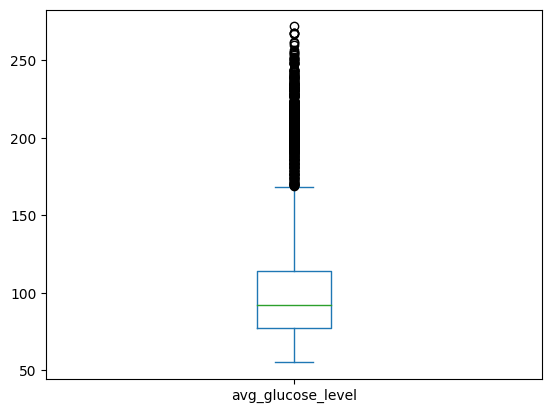

In [37]:
#check for outliers in the numeric variables
data["avg_glucose_level"].plot.box() #yes there are many outliers

<Axes: >

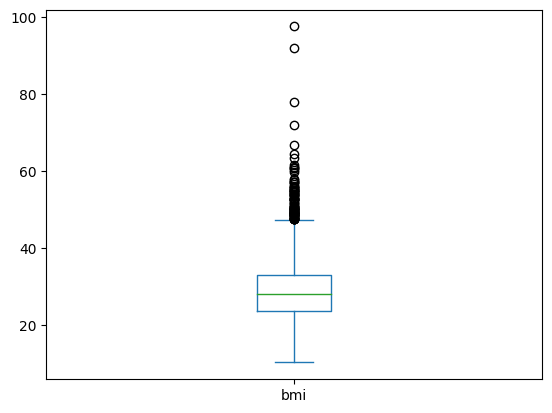

In [38]:
data["bmi"].plot.box() #htere are also many outliers for bmi

<Axes: >

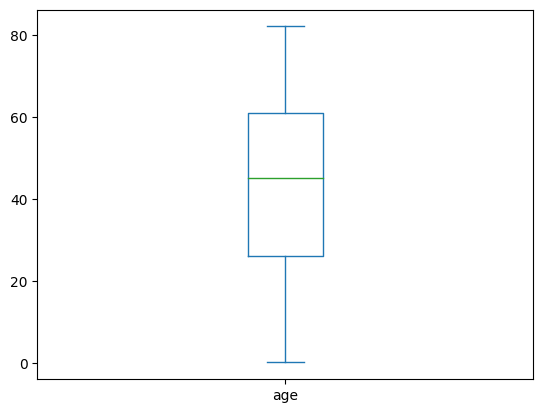

In [39]:

data["age"].plot.box() #there does not appear to be outliers for age variable

<ipython-input-40-82daede06121>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_windsor[ x < lower_whisker ] = lower_whisker
<ipython-input-40-82daede06121>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_windsor[ x < lower_whisker ] = lower_whisker
<ipython-input-40-82daede06121>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

<Axes: >

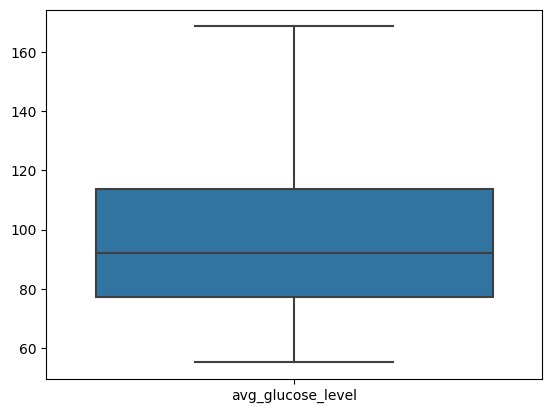

In [40]:
#windsorize the avg_glucose_level and bmi variables

## Function to compute whiskers:
import seaborn as sns
x = data[["avg_glucose_level"]]
def windsorize(x):
    # Compute IQR and 1st,3rd quantiles
    pct25, pct75 = np.percentile(x,[25,75])
    iqr = pct75 - pct25
    # Compute whiskers:
    lower_whisker = pct25 - iqr*1.5
    upper_whisker = pct75 + iqr*1.5
    # Windsorize x:
    x_windsor = x
    x_windsor[ x < lower_whisker ] = lower_whisker
    x_windsor[ x > upper_whisker ] = upper_whisker
    return(x_windsor)

sns.boxplot( windsorize(x))

<ipython-input-41-1ba603b96495>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_windsor[ x < lower_whisker ] = lower_whisker
<ipython-input-41-1ba603b96495>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_windsor[ x < lower_whisker ] = lower_whisker
<ipython-input-41-1ba603b96495>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

<Axes: >

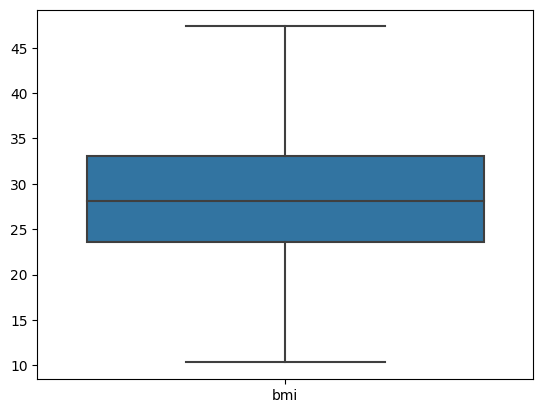

In [41]:
x = data[["bmi"]]
def windsorize(x):
    # Compute IQR and 1st,3rd quantiles
    pct25, pct75 = np.nanpercentile(x,[25,75])
    iqr = pct75 - pct25
    # Compute whiskers:
    lower_whisker = pct25 - iqr*1.5
    upper_whisker = pct75 + iqr*1.5
    # Windsorize x:
    x_windsor = x
    x_windsor[ x < lower_whisker ] = lower_whisker
    x_windsor[ x > upper_whisker ] = upper_whisker
    return(x_windsor)

sns.boxplot( windsorize(x))

In [42]:
# # Testing np.percentile vs np.nanpercentile
# # Compute IQR and 1st,3rd quantiles
# pct25, pct75 = np.nanpercentile(x,[25,75])
# iqr = pct75 - pct25
# # Compute whiskers:
# lower_whisker = pct25 - iqr*1.5
# upper_whisker = pct75 + iqr*1.5
# np.nanpercentile(x['bmi'].values, 50)
# returns 28.1 as opposed to nan - outliers weren't getting removed b/c nan values were getting factored in with np.percentile

In [43]:
# # not necessary so commented out:
# #windsorizing didn't get rid of outliers for 'bmi', so I dropped outliers 46 and above
# data = data.loc[data['bmi']<46,:]
# data["bmi"].plot.box()

Checking distributions of our numeric variables and if any are badly scaled (we should transform them).

<Axes: xlabel='age', ylabel='Count'>

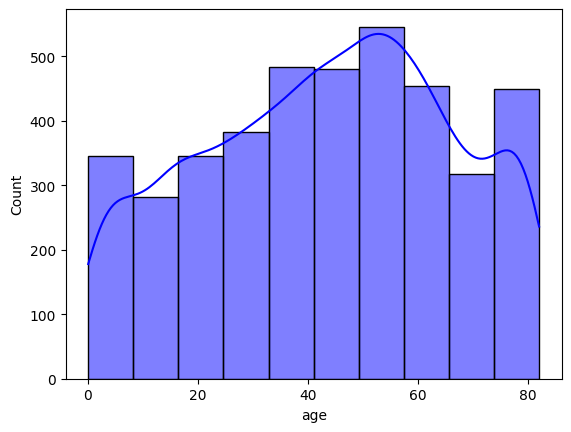

In [44]:
#Age histogram - appears approx. normal
sns.histplot(data["age"], bins=10, color='blue', kde=True)

<Axes: xlabel='avg_glucose_level', ylabel='Count'>

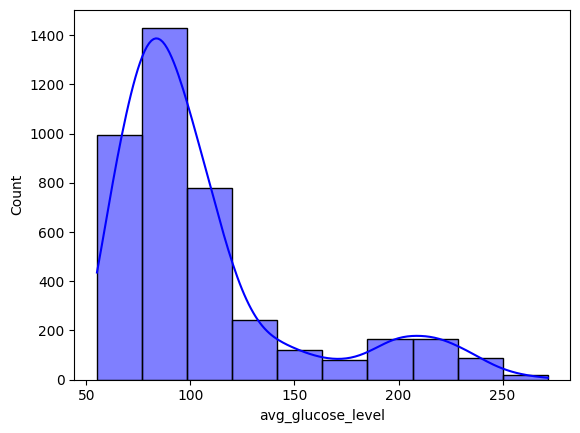

In [45]:
#average glucose level histogram - heavily skewed right, need to transform
sns.histplot(data["avg_glucose_level"], bins=10, color='blue', kde=True)

<Axes: xlabel='log_avg_glucose_level', ylabel='Count'>

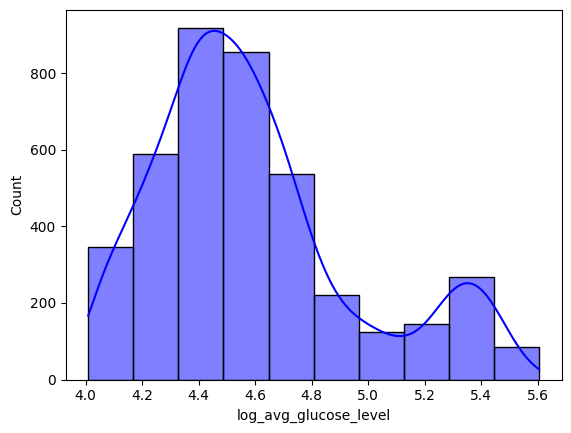

In [46]:
#log transform of avg_glucose_level variable
data['log_avg_glucose_level'] = np.log(data['avg_glucose_level'])
sns.histplot(data["log_avg_glucose_level"], bins=10, color='blue', kde=True)

#still a little skewed, but looks a lot better when log transformed

<Axes: xlabel='bmi', ylabel='Count'>

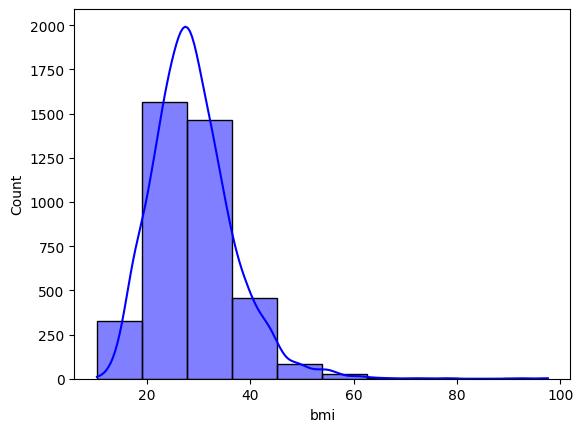

In [47]:
#bmi histogram - appears approx. normal
sns.histplot(data["bmi"], bins=10, color='blue', kde=True)

Checking for missing values.

In [48]:
#Check for any missing values
missing_values = data.isna()
# Count missing values in each column
missing_count = missing_values.sum()
print(missing_count)

id                                  0
age                                 0
hypertension                        0
heart_disease                       0
avg_glucose_level                   0
bmi                               159
stroke                              0
gender_Female                       0
gender_Male                         0
gender_Other                        0
ever_married_No                     0
ever_married_Yes                    0
work_type_Govt_job                  0
work_type_Never_worked              0
work_type_Private                   0
work_type_Self-employed             0
work_type_children                  0
Residence_type_Rural                0
Residence_type_Urban                0
smoking_status_Unknown              0
smoking_status_formerly smoked      0
smoking_status_never smoked         0
smoking_status_smokes               0
log_avg_glucose_level               0
dtype: int64


Handle the missing values in the 'bmi' column.

In [49]:
#based on best approach for handling missing data for linear models (model evaluation notes)

# Step 1: Create a missing dummy variable for 'bmi' column
data['bmi_NA'] = data['bmi'].isnull().astype(int)  # 1 if missing, 0 if not missing

# Step 2: Replace missing values in 'bmi' column with zeros
data['bmi'].fillna(0, inplace=True)
print(data)

         id   age  hypertension  heart_disease  avg_glucose_level   bmi  \
2465  68685  36.0             0              0              65.87  32.2   
4311  59058  45.0             0              0              68.66  25.3   
2375  46068  58.0             0              0             170.93  30.7   
5017  36837  61.0             0              0              69.88  27.1   
753   30550  78.0             0              0             103.86  30.6   
...     ...   ...           ...            ...                ...   ...   
110   59125  53.0             0              0              64.17  41.5   
139   29281  76.0             1              0             194.37  27.0   
207   37060  81.0             0              0              80.13  23.4   
218   29552  55.0             1              1             210.40  40.0   
89    14499  47.0             0              0              86.94  41.1   

      stroke  gender_Female  gender_Male  gender_Other  ...  \
2465       0              0         

In [50]:
missing_values = data.isna()
# Count missing values in each column
missing_count = missing_values.sum()
print(missing_count)

#There are no missing values now

id                                0
age                               0
hypertension                      0
heart_disease                     0
avg_glucose_level                 0
bmi                               0
stroke                            0
gender_Female                     0
gender_Male                       0
gender_Other                      0
ever_married_No                   0
ever_married_Yes                  0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
Residence_type_Rural              0
Residence_type_Urban              0
smoking_status_Unknown            0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
log_avg_glucose_level             0
bmi_NA                            0
dtype: int64


It looks like there are no people with a gender of "Other" in the testing data, so we'll examine the gender value counts here to see if we should add a dummy variable (filled with 0s) for "Other" in the testing data or whether we should drop those data points from this dataset.

In [51]:
data["gender_Other"].value_counts()

0    4086
1       1
Name: gender_Other, dtype: int64

Since there's only one person with a gender of "Other", we'll drop it from this dataset and remove the "gender_Other" dummy variable.

In [52]:
data.drop(data.loc[data["gender_Other"] == 1].index, inplace=True)
data["gender_Other"].value_counts()

0    4086
Name: gender_Other, dtype: int64

In [53]:
data.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,...,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,log_avg_glucose_level,bmi_NA
2465,68685,36.0,0,0,65.87,32.2,0,0,1,0,...,0,0,0,1,0,1,0,0,4.187683,0
4311,59058,45.0,0,0,68.66,25.3,0,1,0,0,...,0,0,1,0,0,0,1,0,4.229167,0
2375,46068,58.0,0,0,170.93,30.7,0,0,1,0,...,1,0,1,0,1,0,0,0,5.141254,0
5017,36837,61.0,0,0,69.88,27.1,0,1,0,0,...,1,0,0,1,0,0,1,0,4.246779,0
753,30550,78.0,0,0,103.86,30.6,0,1,0,0,...,0,0,0,1,1,0,0,0,4.643044,0


Looking at the data, it seems that there's an unnamed index column, which we will want to ignore, as well as an id column which is not useful.

In [54]:
data.drop(['gender_Other'], axis=1, inplace=True)
data.drop(['id'], axis=1, inplace=True)
data.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke', 'gender_Female', 'gender_Male', 'ever_married_No',
       'ever_married_Yes', 'work_type_Govt_job', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children',
       'Residence_type_Rural', 'Residence_type_Urban',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes',
       'log_avg_glucose_level', 'bmi_NA'],
      dtype='object')

**Challenges in reading, cleaning, and preparing the data for analysis**
- Deciding what to do with missing values - we decided to create a dummy na column for bmi and then also convert all of the missing values to 0. The dummy column makes it clear which bmi values are missing (1) and this approach was utilized since it is generally the best approach for linear models (according to the model_evaluation notes)
- When and how to transform badly scared variables
  - bmi had a very slightly right skewed histogram, however, it was close enough to approx. normal that we left it
  - average glucose level had a very skewed right histogram, and after attempting many log, sqrt, and arcsin transformations, we determined that the log transformation made the histogram appear the most normal.
- windsorizing worked well for average glucose level variable but for bmi, this still left some outliers, so I had to just drop values >=46 for bmi. (Edit: The reason why outliers were left was because we were using the np.percentile function instead of the np.nanpercentile function. With np.percentile, nan values were being used in computation, whereas with np.nanpercentile, it "Computes the qth percentile of the data along the specified axis, while ignoring nan values." Once nan values were ignored, no outliers were left after running the windsorizing function. In future, nan values could be handled first and then np.percentile used. However, it seems like just using np.nanpercentile is a valid approach.)



In [55]:
data.to_csv('./Group4/project_2/data/cleaned_training_data.csv', index=False)